# Hierarchical Agglomerative Clustering

## Visuals

Can allow us to see the clusters within clusters 

Visual == dendrogram
    
- Useful in visualizing HIGH dimensional separation
- can say only want "n" clusters --> cut the link of the highest tree for two clusters
    + clusters are more alike

<img src='images/clustergram.png' width=60%/>

## Types

### Single link

(Not in scikit-learn)

- links at the distance between (closest points) in each cluster
- tends to create elongated clusters (reachs out to the other points)
- tends to eat-up a lot of the points for a cluster

### Complete link

- Same as single link, however uses the farthest point
- Tends to create more compact clusters
- However, will tend to "ignore" other points that are *similar* to the actual cluster

### Average link

- Same as complete but will use the measurement average for each pt-pt for cluster

### Ward

- Minimizes variance during cluster merge
    + Center between cluster calculated
    + Sum Sq-Distance from pts in clusters to center
    + Subtract pt distance from cluster centers
 
 
 $$Dist(A, B) = \sum_{x_a \in A} \sum_{x_b \in B} \left [ (c_0-x_a)^2 + (c_0-x_b)^2  - (c_a-x_a)^2 - (c_b-x_b)^2  \right] $$

## Example Code

In [5]:
from sklearn import datasets, cluster
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, ward, single

X = datasets.load_iris().data[:30]

c = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = c.fit_predict(X)

model = cluster.AgglomerativeClustering(n_clusters=3)
model = model.fit(X)


### SciPy for dendrograms

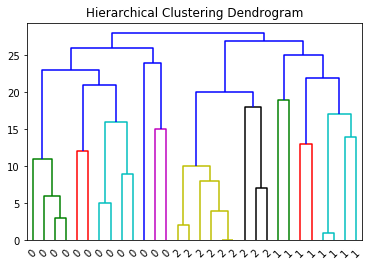

In [6]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.show()

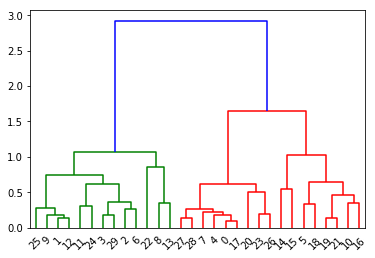

In [8]:
link_matrix = ward(X)
dendrogram(link_matrix)
plt.show()